In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
import pandas as pd
from pandas import Series
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox

In [77]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import pmdarima as pm

In [4]:
from datetime import datetime, timedelta, date

In [78]:
import prophet
from prophet import Prophet

In [79]:
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


import pandas as pd
from pandas import Series
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox


import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Data Source
import yfinance as yf

# Stats models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import pmdarima as pm

# Date tools
from datetime import datetime, timedelta, date

# Prophet model
import prophet
from prophet import Prophet

# Imports for model metrics and performance
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [81]:
import re

In [82]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
plt.rcParams["figure.figsize"] = (14,6)
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [88]:
data_path = ("../raw_data/clean_raw_data.csv")
data = pd.read_csv(data_path)
data.head()

,timestamp,open,high,low,close,volume,CMF,FII,MFI,VWA,AOI,KAMA,PPO,PPO_signal,PVO,PVO_signal,ROC,rsi,stoch_RSI,StochOscillator,StochOscillator_signal,TSI,UltimateOscillator,WilliamsRIndicator,ATR,BOL_lband,BOL_hband,BOL_avg,KCW,KCP,KCM,DCL,DCH,DCM,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_14,EMA_20,EMA_50,EMA_100,EMA_200,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR,SMA_14,SMA_20,SMA_50,SMA_100,SMA_200,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,wma_9,wma_20,wma_50,wma_100,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-17 04:00:00,10216.35,10238.95,10194.39,10209.45,872.764,-0.120924,-913.266701,28.652105,10185.127432,-5.729912,10184.207475,-0.155468,-0.243303,1.037447,0.552894,0.598202,46.271721,0.676076,51.773363,58.093400,-10.639675,50.178602,-48.226637,52.300392,10073.766700,10358.878300,10216.3225,1.029615,0.418821,10217.990500,10080.7,10329.38,10205.040,1.452368,36.183688,30.858004,21.418009,60.0,-52.0,8.0,-3.877403,-79.6825,10216.809022,10223.590398,10253.805665,10258.150614,10223.457350,-10.009420,0.867360,-10.876780,-15.906877,-24.904204,26.531786,10100.005486,10181.362143,10216.3225,10269.6334,10292.0137,10247.86650,97.040222,-0.038235,-0.167639,1.075610,0.907971,10203.142000,10203.709333,10246.597545,10275.790895,3005.7,2.25,1.7,1,0.45992,0.46011,-1,48.386232,-1
1,2019-09-17 05:00:00,10208.81,10232.07,10204.53,10223.97,819.923,-0.114688,917.954536,36.501645,10187.270366,-12.684824,10186.551361,-0.137502,-0.222143,0.532956,0.548907,0.861528,48.644318,0.743204,57.612192,54.702161,-9.336736,54.098656,-42.387808,50.531792,10075.379977,10349.352023,10212.3660,1.031969,0.594886,10213.968500,10080.7,10329.38,10222.540,1.372308,34.888995,29.656738,20.584231,56.0,-52.0,4.0,6.904724,-92.2960,10217.763819,10223.626551,10252.635639,10257.473770,10223.462451,-9.424722,1.525039,-10.949762,-14.067871,-22.736938,26.587424,10104.592976,10186.853571,10212.3660,10267.6942,10290.3989,10248.98635,98.520111,-0.035367,0.026085,1.064804,1.090889,10208.823048,10204.437667,10244.806824,10274.443495,3005.7,2.25,1.7,-1,0.40934,0.45992,-1,42.873022,-1
2,2019-09-17 06:00:00,10224.11,10230.44,10187.88,10224.09,922.804,-0.112046,802.637671,36.306243,10191.939033,-26.571000,10188.754395,-0.121765,-0.202067,1.083131,0.655751,1.027859,48.664494,0.743775,57.660447,55.682001,-8.306903,51.810427,-42.339553,49.962379,10077.635517,10339.275483,10208.4555,1.049208,0.632549,10209.891000,10080.7,10329.38,10222.540,1.288889,33.967875,30.232613,19.331768,52.0,-44.0,8.0,5.018498,-64.1855,10218.607310,10223.670689,10251.516202,10256.812705,10223.468695,-8.210570,2.548815,-10.759384,-12.457165,-20.680983,26.638149,10109.088717,10192.235714,10208.4555,10265.5230,10288.4885,10248.40620,99.260055,-0.032511,0.148340,0.933562,1.081902,10213.787905,10205.554238,10243.096855,10273.130448,3005.7,2.25,1.7,-1,0.31251,0.40934,-1,42.291553,-1
3,2019-09-17 07:00:00,10225.02,10230.79,10192.69,10193.85,905.598,-0.124361,-3224.208213,35.631136,10195.919801,-33.398088,10188.963245,-0.131656,-0.187985,1.339276,0.792456,0.488749,43.975832,0.611118,45.500241,53.590960,-8.853256,45.944458,-54.499759,49.115066,10078.361917,10328.766083,10203.5640,1.059908,0.394859,10205.222667,10080.7,10329.38,10224.335,1.199061,33.103085,28.557447,18.311510,48.0,-44.0,4.0,0.707552,-58.8340,10215.306335,10220.830623,10249.254783,10255.565919,10223.173982,-7.215594,3.074639,-10.290233,-13.465561,-19.237899,26.537221,10113.494542,10196.322143,10203.5640,10262.9314,10286.5536,10247.61835,99.630028,-0.030300,0.189927,0.914300,1.104227,10214.003143,10204.163238,10240.286149,10271.256418,3005.7,2.25,1.7,-1,0.14629,0.31251,-1,41.595938,-1
4,2019-09-17 08:00:00,10193.21,10215.07,10165.00,10195.82,1089.829,-0.114965,-2456.898021,34.774165,10199.535893,-36.033412,10189.290069,-0.136376,-0.177663,3.169482,1.267861,0.503611,44.351977,0.566647,46.292424,49.817704,-9.182378,49.592935,-53.707576,49.183275,10

In [89]:
data.isnull().sum()

timestamp         0
open              0
high              0
low               0
close             0
                 ..
Fisher            0
Fisher_trigger    0
supertrend        0
chop_index        0
Velocity          0
Length: 78, dtype: int64

In [14]:
#data = data.drop_duplicates()

In [18]:
#had to remove duplicates
series = TimeSeries.from_dataframe(data,"timestamp", "close", freq='H')

In [ ]:
from darts.models import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

In [ ]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [ ]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [ ]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

In [ ]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [ ]:
from darts.models import Theta

In [ ]:
model = Theta(theta = 1)

In [ ]:
pred = model.predict(len(val))

In [ ]:
from darts.metrics import mape

In [ ]:
score=mape(val,pred)

In [ ]:
from darts.metrics import mase

In [ ]:
score=mase(val,pred,train)

In [ ]:
historical_forecast = model.historical_forecasts(series = series,start = 0.5,forecast_horizon=12)

Choosing the model for forecasting

Gridsearch best model.best params

In [40]:
parametersm={'theta':[0.5,1,1.5,2,2.5],
             'season_mode':[SeasonalityMode.MULTIPLICATIVE,
                            SeasonalityMode.ADDITIVE]}

NameError: name 'SeasonalityMode' is not defined

# STATIONARITY

In [45]:
from statsmodels.tsa.stattools import adfuller

adfuller(data_test.close)[1]

0.711452075730024

In [46]:
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])


multiplicative resid:  0.0001498752167389312


# AUTOCORRELATION

Measures the correlation between

the time series  
Y
(
t
)
 
a lagged version of itself  
Y
(
t
−
i
)

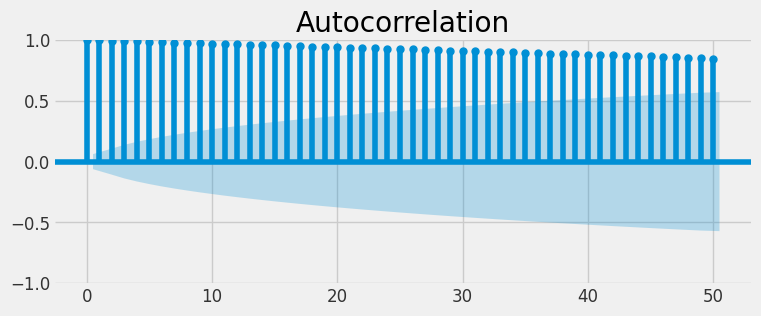

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_test.close, lags=50, ax=ax)
plt.show()

# ARIMA

In [50]:
non_differenced_data = pd.Series([1, 5, 7, 16, 25, 40])
differenced_1 = non_differenced_data.diff()
print(differenced_1)

0     NaN
1     4.0
2     2.0
3     9.0
4     9.0
5    15.0
dtype: float64


In [49]:
print(differenced_1.diff())

0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
5    2.0
dtype: float64


In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
data.set_index('timestamp',inplace=True)

In [23]:
data

,open,high,low,close,volume
timestamp,,,,,
2019-09-08 20:00:00,10000.00,10000.00,10000.00,10000.00,0.002
2019-09-08 21:00:00,10000.00,10000.00,10000.00,10000.00,0.000
2019-09-08 22:00:00,10344.77,10357.53,10337.43,10340.12,471.659
2019-09-08 23:00:00,10340.12,10368.64,10334.54,10351.42,583.271
2019-09-09 00:00:00,10351.42,10391.90,10324.77,10391.90,689.759
...,...,...,...,...,...
2023-06-03 20:00:00,27239.40,27246.40,27101.00,27147.60,15130.376
2023-06-03 21:00:00,27147.70,27173.70,27113.90,27138.80,6229.878
2023-06-03 22:00:00,27138.90,27153.60,27000.00,27084.90,15389.644


In [24]:
type(data.index)

pandas.core.indexes.base.Index

In [25]:
data_test = data.iloc[:1000]

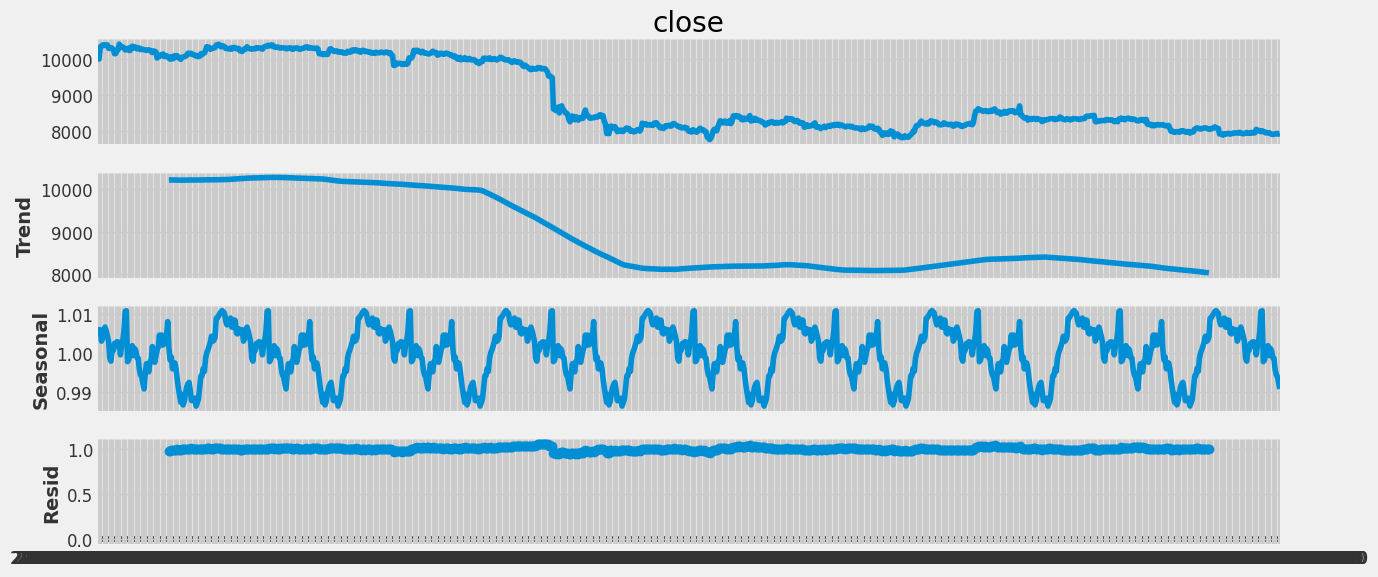

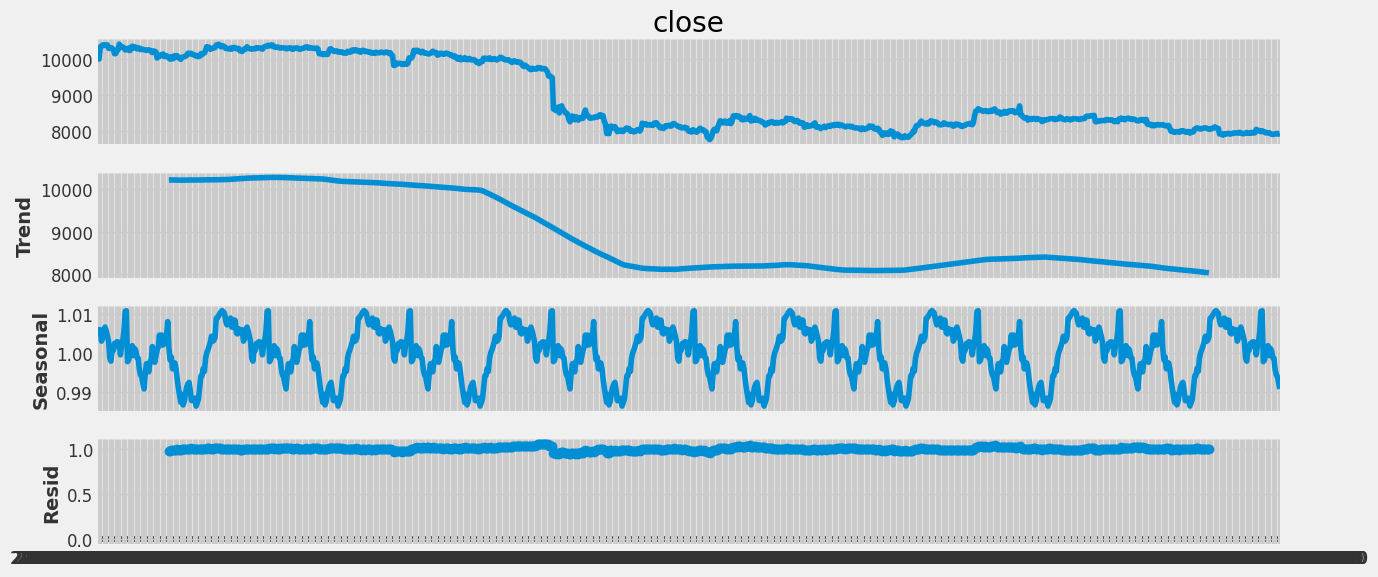

In [29]:
result_mul = seasonal_decompose(data_test['close'], model='multiplicative',period=120)
result_mul.plot()

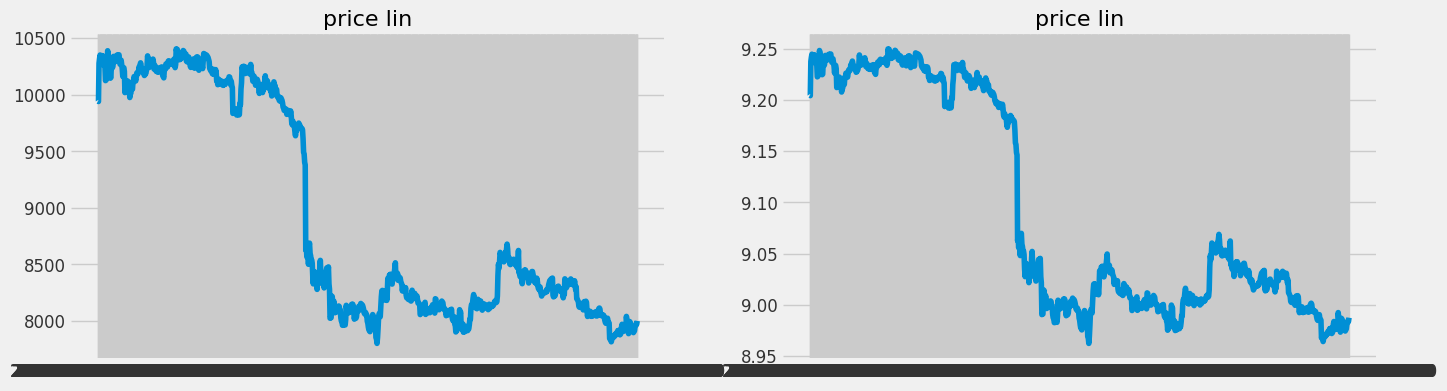

In [32]:
data_test['deseasonalized'] = data_test.close.values/result_mul.seasonal

plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(data_test.deseasonalized);
plt.title('price lin', fontsize=16);

# Also remove exponential trend 
data_test['linearized'] = np.log(data_test['deseasonalized'])

plt.subplot(1,2,2); plt.plot(data_test['linearized'])
plt.title('price lin', fontsize=16);

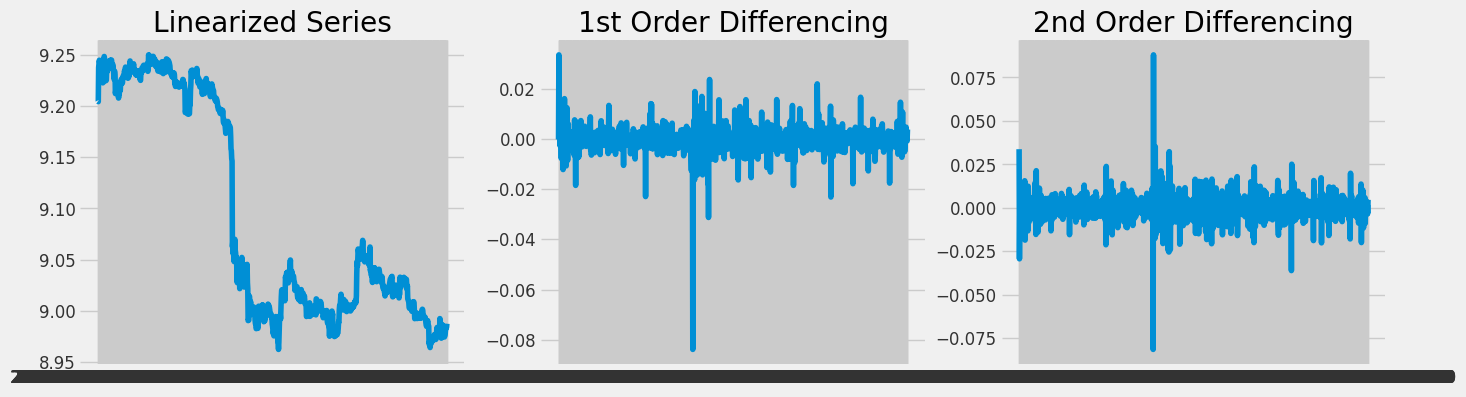

In [51]:
fig, axes = plt.subplots(1, 3,figsize=(15,4))

axes[0].plot(data_test['linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff = data_test['linearized'].diff().dropna()
axes[1].plot(y_diff); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff = data_test['linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff); axes[2].set_title('2nd Order Differencing');

In [53]:
print('p-value zero-diff: ', adfuller(data_test['linearized'])[1])
print('p-value first-diff: ', adfuller(data_test['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(data_test['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.7377477699864303
p-value first-diff:  2.9520514237359755e-24
p-value second-diff:  6.919364892231445e-22


In [34]:
from pmdarima.arima.utils import ndiffs
ndiffs(data_test['linearized'])

1

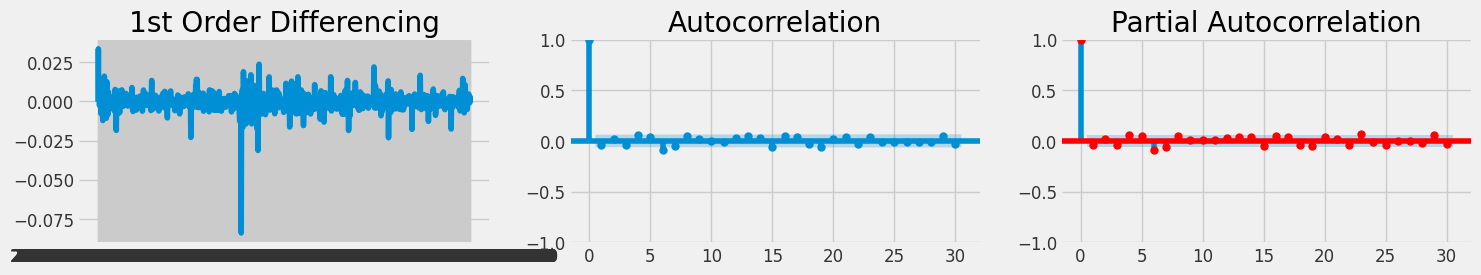

In [54]:
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

In [38]:
arima = ARIMA(data_test['linearized'], order=(2, 1, 1), trend='t')
arima = arima.fit()

In [39]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                 1000
Model:                 ARIMA(2, 1, 1)   Log Likelihood                3775.015
Date:                Thu, 08 Jun 2023   AIC                          -7540.030
Time:                        12:20:41   BIC                          -7515.497
Sample:                    09-08-2019   HQIC                         -7530.705
                         - 10-20-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0002      0.000     -1.122      0.262      -0.001       0.000
ar.L1      -8.261e-07      0.017  -4.99e-05      1.000      -0.032       0.032
ar.L2       4.969e-07      0.023   2.12e-05      1.000      -0.046       0.046
ma.L1      -8.264e-07      0.017     -5e-05      1.000      -0.032       0.032
sigma2      3.057e-05   3.13e-07     97.722      0.000       3e-05    3.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):            129929.86
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -3.37
Prob(H) (two-sided):                  0.84   Kurtosis:                        58.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+16. Standard errors may be unstable.
"""

parameters

In [55]:
import pmdarima as pm
smodel = pm.auto_arima(data_test['linearized'],
                       start_p=1, max_p=2,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7535.189, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7545.571, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7544.901, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7544.211, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7545.571, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.999 seconds


In [58]:
data_test['linearized']

timestamp
2019-09-08 20:00:00    9.204598
2019-09-08 21:00:00    9.204345
2019-09-08 22:00:00    9.237788
2019-09-08 23:00:00    9.241825
2019-09-09 00:00:00    9.244861
                         ...   
2019-10-20 07:00:00    8.981001
2019-10-20 08:00:00    8.981930
2019-10-20 09:00:00    8.984378
2019-10-20 10:00:00    8.983544
2019-10-20 11:00:00    8.987258
Name: linearized, Length: 1000, dtype: float64

(<Figure size 1400x600 with 1 Axes>,)

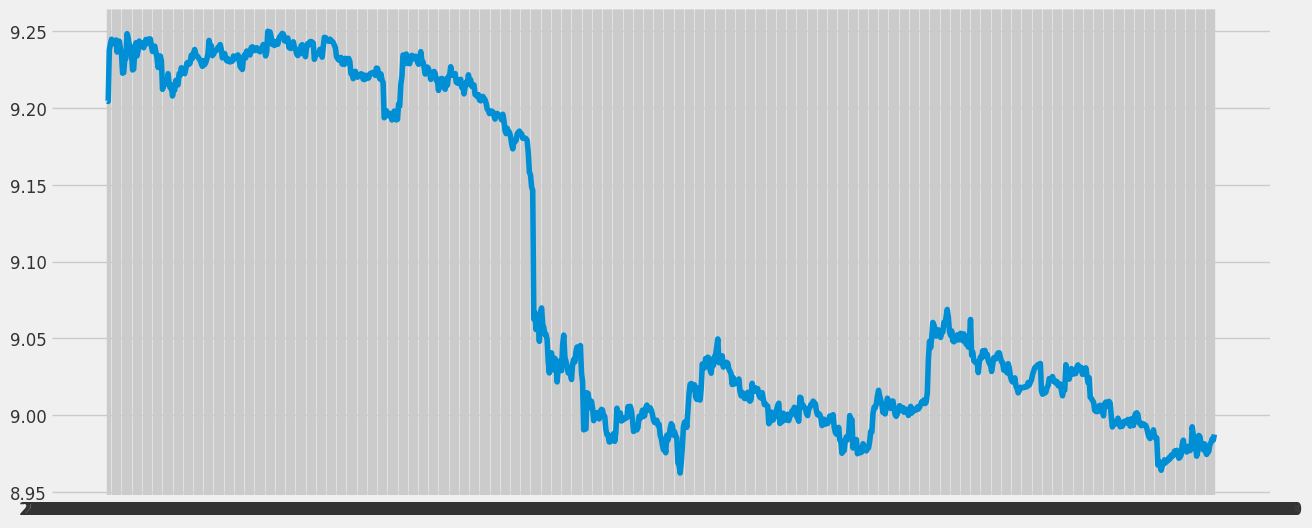

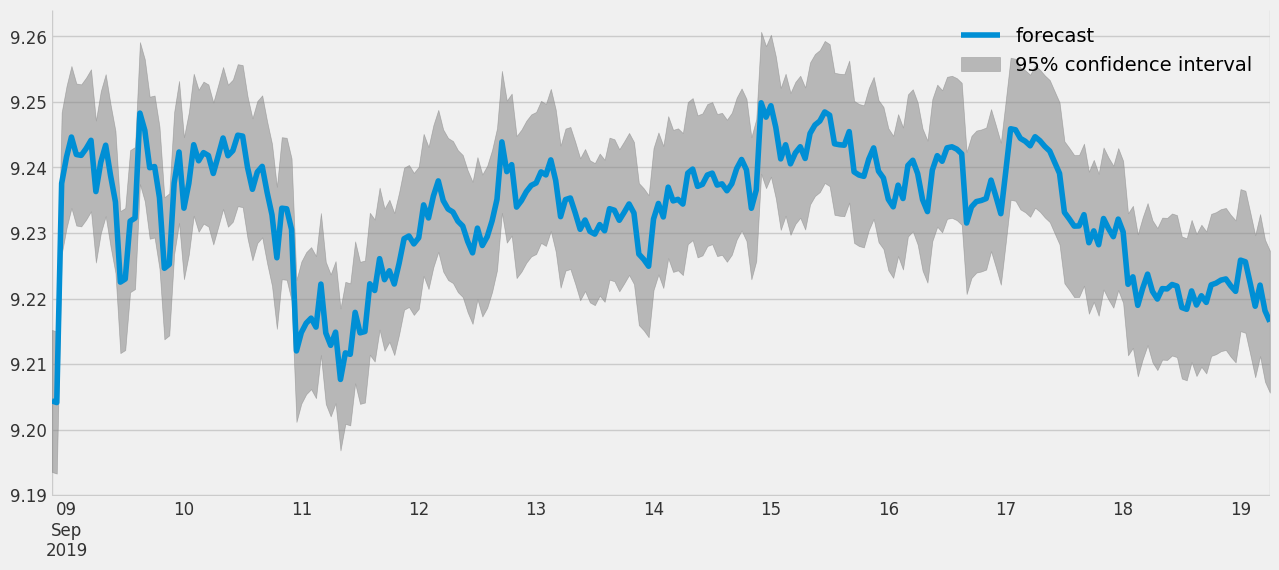

In [61]:
from statsmodels.graphics.tsaplots import plot_predict

%matplotlibinline

#fig, axs = plt.subplots(1, 1, figsize=(12, 5))
plt.plot(data_test['linearized'], label='linearized')
plot_predict(arima, start=1, end=250), #ax=axs)

# SARIMA

Train split

In [66]:
data_test['log'] = np.log(data_test.close)

In [67]:
train = data_test.log[0:150]
test = data_test.log[150:]

In [69]:
smodel = pm.auto_arima(train, seasonal=True, m=12, 
                       start_p=0, max_p=1, max_d=1, start_q=0, max_q=1,
                       start_P=0, max_P=2, max_D=1, start_Q=0, max_Q=2, 
                       trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1163.212, Time=0.23 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1166.586, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1165.369, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1164.895, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-1162.055, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-1164.904, Time=1.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-1164.522, Time=0.93 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-1164.457, Time=0.56 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-1162.505, Time=2.49 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-1168.221, Time=0.69 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-1164.944, Time=1.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1166.178, Time=0.59 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-1165.905, Time=0.35 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-1164.422, Time=1.02 sec
 ARIM

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima = SARIMAX(train, order=(0, 1, 0), seasonal_order=(1, 0, 0, 12))
sarima = sarima.fit(maxiter=75)

results = sarima.get_forecast(len(test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.87437D+00    |proj g|=  1.08790D+02

At iterate    5    f= -3.91104D+00    |proj g|=  5.29680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     22      1     0     0   5.297D-02  -3.911D+00
  F =  -3.9110408678095521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0, 1, 0), seasonal_order=(1, 0, 0, 12))
sarima = sarima.fit(maxiter=75)

results = sarima.get_forecast(len(test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.87437D+00    |proj g|=  1.08790D+02

At iterate    5    f= -3.91104D+00    |proj g|=  5.29680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     22      1     0     0   5.297D-02  -3.911D+00
  F =  -3.9110408678095521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [76]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                log   No. Observations:                  150
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 586.656
Date:                            Thu, 08 Jun 2023   AIC                          -1169.312
Time:                                    14:07:04   BIC                          -1163.304
Sample:                                09-08-2019   HQIC                         -1166.871
                                     - 09-15-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1833      0.092     -1.990      0.047      -0.364      -0.003
sigma2      2.216e-05   1.07e-06     20.778      0.000    2.01e-05    2.43e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):              1599.99
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX